<a href="https://colab.research.google.com/github/0vv0xtt/0vv0xtt/blob/main/DS_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

#importing the libraries
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn import datasets  
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 
import seaborn as sns 
import matplotlib.pyplot as plt
seed = random.seed(18969556)#my student number

In [ ]:
#in this code section, I will be transferring all the data into pandas data fram
file_path = 'https://raw.githubusercontent.com/0vv0xtt/DS-csv/main/theData.csv' #file path to the rating data"
file_path1 = 'https://raw.githubusercontent.com/0vv0xtt/DS-csv/main/theArt.csv' #file path of the artworks"
#data = np.genfromtxt('raw.githubusercontent.com/0vv0xtt/DS-csv/main/theArt.csv',delimiter=',')
npdata = np.genfromtxt('https://raw.githubusercontent.com/0vv0xtt/DS-csv/main/theData.csv',delimiter=',')
data = pd.read_csv(file_path,header = None)
art = pd.read_csv(file_path1) #the pandas data frame that took care of 
#art[art.iloc[:, 5] == 2]
rating=data.iloc[:,0:91]


# question 1&2

Text(0, 0.5, 'mean rating of art work')

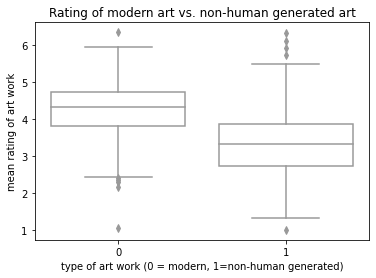

In [ ]:
#code for question1 and 2 - Is classical art more well liked than modern art?
df1_1 = art[art['Source (1 = classical, 2 = modern, 3 = nonhuman)']==1] #classical art work
df1_2 = art[art['Source (1 = classical, 2 = modern, 3 = nonhuman)']==2] #modern art work
'''
after looking at the dataframes, I know that #1-35 is classical art, ##36-70 is modern art #71-91 is nonhuman art'''
#I am taking the row mean to first get the individual's mean preference on type of artwork
classical=npdata[:,0:35]
classicalrowMeans = np.mean(classical,axis=1)   
modern=npdata[:,35:70]
modernrowMeans = np.mean(modern,axis=1)   
nonhuman=npdata[:,70:91]
nonhumanrowMeans = np.mean(nonhuman,axis=1)   

classical_m=npdata[:,0:35].mean()
modern_m=npdata[:,36:70].mean()
nonhuman_m = npdata[:,70:91].mean()
#conducting the paired t-test
classical_greater_modern = stats.ttest_rel(classicalrowMeans,modernrowMeans,alternative='greater')
modern_nonhuman=stats.ttest_rel(modernrowMeans,nonhumanrowMeans)

#classical_greater_modern
#df1_1.shape, df1_2.shape

artwork_r = [classicalrowMeans,modernrowMeans]
artwork_r2 = [modernrowMeans,nonhumanrowMeans]
'''
fig = sns.boxplot(data=artwork_r, color='white').set(title='Rating of classical art vs. modern art')
plt.xlabel("type of art work (0 = classical, 1=modern)")
plt.ylabel("mean rating of art work")
'''
fig2 = sns.boxplot(data=artwork_r2, color='white').set(title='Rating of modern art vs. non-human generated art')
plt.xlabel("type of art work (0 = modern, 1=non-human generated)")
plt.ylabel("mean rating of art work")


# question 3


In [ ]:
#question 3, does women give higher art preference rating than men?
male = data[data.iloc[:,216]==1] #male
female =  data[data.iloc[:,216]==2] #female
female_rating = female.iloc[:,0:91]
male_rating = male.iloc[:,0:91]
m_mean = male_rating.mean(axis=1)
#m_mean = m_mean.to_numpy #np array that consists of each male's individual preference
f_mean = female_rating.mean(axis=1)

#f_mean = f_mean.,to_numpy
stats.ttest_ind(f_mean,m_mean,alternative='greater')

Ttest_indResult(statistic=0.1378782526747258, pvalue=0.4452193254023975)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


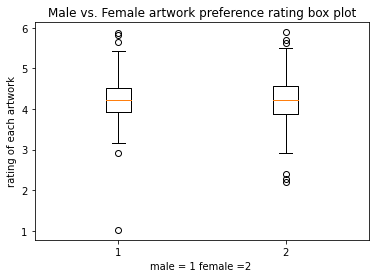

In [ ]:
rating1 = [m_mean,f_mean]
plt.boxplot(rating1)
plt.ylabel("rating of each artwork")
plt.xlabel("male = 1 female =2 ")
plt.title("Male vs. Female artwork preference rating box plot")
plt.show()


# question 4

Text(0, 0.5, 'rating on art work')

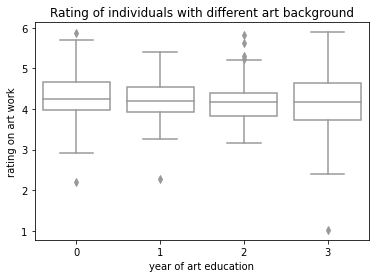

In [ ]:
#4) Is there a difference in the preference ratings of users with some art background (some art education) vs. none? 
n_artedu = data[data.iloc[:,218]==0]#never had any art education
n_artedu_rating = n_artedu.iloc[:,0:91] #only looking at the rating part
n_artedu_mean = n_artedu_rating.mean(axis=1) #taking each person's average rating on each art piece
w_artedu = data[data.iloc[:,218]!=0]#had art education
w_artedu_rating = w_artedu.iloc[:,0:91]
w_artedu_mean = w_artedu_rating.mean(axis=1)


one_artedu = data[data.iloc[:,218]==1]#one year
two_artedu = data[data.iloc[:,218]==2]
three_artedu = data[data.iloc[:,218]==3]
one_artedu_rating = one_artedu.iloc[:,0:91]
two_artedu_rating = two_artedu.iloc[:,0:91]
three_artedu_rating = three_artedu.iloc[:,0:91]
one_artedu_mean = one_artedu_rating.mean(axis=1)
two_artedu_mean = two_artedu_rating.mean(axis=1)
three_artedu_mean = three_artedu_rating.mean(axis=1)


indep_t_test = stats.ttest_ind(n_artedu_mean,w_artedu_mean)
#anova_test= 
anova= stats.f_oneway(n_artedu_mean,one_artedu_mean,two_artedu_mean,three_artedu_mean)
edu_rating= [n_artedu_mean,one_artedu_mean,two_artedu_mean,three_artedu_mean]
fig1 = sns.boxplot(data=edu_rating, color='white').set(title='Rating of individuals with different art background')
plt.xlabel("year of art education")
plt.ylabel("rating on art work")

# Question 5

coefficient of determination: 0.14770631709322313
intercept: 6.715961777245145
slope: [-0.61311182]


Text(0.5, 1.0, 'energy ratings vs. artwork preference ratings')

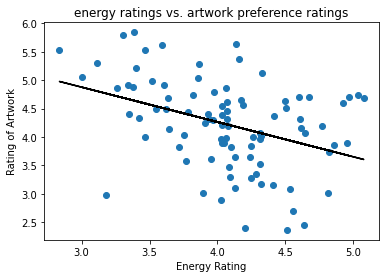

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
energy = npdata[:,91:182].mean(axis=0)
rating1=rating.mean()
x=energy.reshape((-1, 1))
y=rating1
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")
y_pred = LinearRegression().fit(x, y).predict(x)
#var1 = 2 #Which is our first variable
#var2 = 3 #2nd variable to relate it to

r = np.corrcoef(energy,rating)
plt.plot(energy,rating1,'o') 
plt.plot(x, y_pred, color="black")
plt.xlabel('Energy Rating') #Suitable x-axis label
plt.ylabel('Rating of Artwork') #Suitable y-axis label
plt.title('r = {:.3f}'.format(r[0,1]))
plt.title("energy ratings vs. artwork preference ratings")

coefficient of determination: 0.39416267356225226
intercept: [ 0.86608367  2.2550393   2.30709771  2.41121696  2.53730704 -0.06701781
  1.60352541  0.40426286  0.84884391  1.42758225  1.77856019  0.84716672
  2.31679185  3.00251741  2.14105177  2.24897653  2.92054291 -0.28747489
  2.15147073  2.08043182  0.90296452  0.14315496  1.92893582  2.89724354
  2.09998864  3.3179079   0.55608876  2.93067803  1.59728281  0.69447489
  1.25457015  0.96159044  1.21849045  2.00987483  1.15080877  2.30861413
  3.80350298  1.95555669  1.57355241  0.93714357  1.49806443  0.30593324
  1.53909385  0.61859384 -0.10161091  1.16868294  1.63468064  0.12274392
  2.79008475  2.61508402  0.57121029  0.35144141  0.98956211  2.25295844
  1.23838799  1.16710976  0.54229222  1.157497    2.54153345  3.13210369
  0.77142     1.15858497  1.35447932  1.77952385  3.01260835  1.07456025
  3.03046281  1.77159654  0.29810102  2.06252379  1.04734978  1.17523263
  1.70948592  1.97585558  3.29906463  1.2344486   1.60075396  0

In [ ]:
from scipy.stats import spearmanr
energy1 = data.iloc[:,91:182].mean(axis=0)
rating2=rating.mean()
rho, p = spearmanr(energy1, rating2)

# Question 6

In [ ]:
from sklearn import linear_model
#data.loc[:,215], data.loc[:,216],data.loc[:,218]
X = data.iloc[: , [215, 216, 218]].copy() 
energy = data.iloc[:,91:182].mean(axis=1)
energy = energy.to_frame()
X['energy'] = energy
X=X.fillna(0)
Y = rating.mean(axis=1)
reg = linear_model.LinearRegression()
reg.fit(X, Y)
Intercept=reg.intercept_
Coefficients=reg.coef_
Y_pred = LinearRegression().fit(X, Y).predict(X)

#r = np.corrcoef(X,Y)
reg.score(X, y)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.10976152205010903

# Question 8 

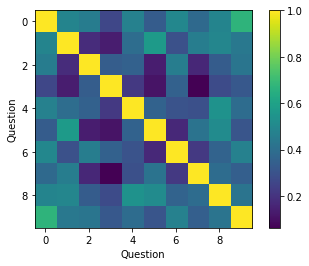

In [ ]:
question = np.array(range(1,11))#Keep track of the question numbers
data8 = data.iloc[:,205:215] #take out the Dark energy question part
data8=data8.dropna()

corrM = data8.corr()#correlation matrix for Dark energy
plt.imshow(corrM)
plt.xlabel('Question')
plt.ylabel('Question')
plt.colorbar()
plt.show()
#standardizing the data
normalized_data=(data8-data8.mean())/data8.std()
normalized_data=normalized_data.dropna(axis=0) #I dropped the rows that contained NAN values
pca = PCA().fit(normalized_data) 
pca2 = PCA().fit(data8)
#eigenvalues
eigVals = pca.explained_variance_
eigVals2 = pca2.explained_variance_
#eigenvectors
loadings = pca.components_ 
loadings2 = pca2.components_
rotatedData = pca.fit_transform(normalized_data)
varExplained = eigVals/sum(eigVals)*100

43.137
14.183
7.957
7.147
5.953
5.514
5.121
4.185
3.726
3.077


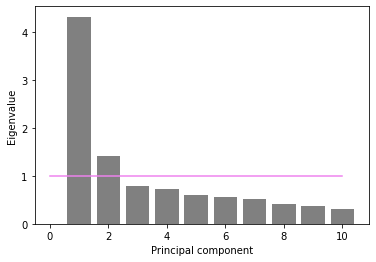

Number of factors selected by Kaiser criterion: 2
Number of factors selected by elbow criterion: 1
Number of factors to account for at least 90% variance: 8


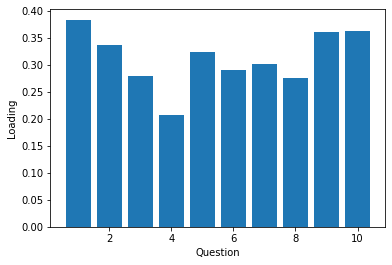

In [ ]:
for ii in range(len(varExplained)):
   print(varExplained[ii].round(3))
numQuestions1 = len(question)
x = np.linspace(1,numQuestions1,numQuestions1)
plt.bar(x, eigVals, color='grey')
plt.plot([0,numQuestions1],[1,1],color='violet') # some violet pride
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()
kaiserThreshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVals > kaiserThreshold))
print('Number of factors selected by elbow criterion: 1') #Due to visual inspection by primate
threshold = 90 
eigSum = np.cumsum(varExplained)
print('Number of factors to account for at least 90% variance:', np.count_nonzero(eigSum < threshold) + 1)
whichPrincipalComponent = 0  # Select and look at one factor at a time, in Python indexing
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1 because the direction is arbitrary
#and Python reliably picks the wrong one. So we flip it.
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot

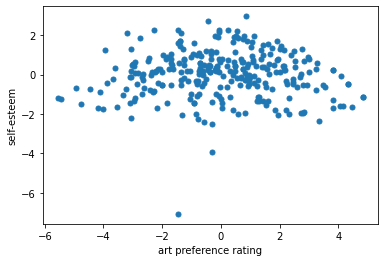

array([0.38364169, 0.33662453, 0.27865626, 0.20687105, 0.3241872 ,
       0.2909794 , 0.3023467 , 0.2752813 , 0.36173059, 0.36228351])

In [ ]:
plt.plot(rotatedData[:,0]*-1,rotatedData[:,1]*-1,'o',markersize=5) 

plt.xlabel('art preference rating')
plt.ylabel('self-esteem')
plt.show()
P8 = loadings[whichPrincipalComponent,:]*-1
P8

#Question 9

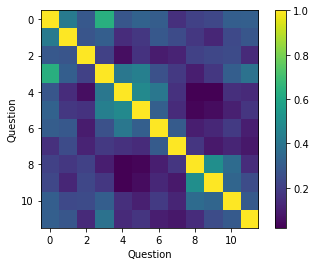

In [ ]:
#Q5 dark personality traitrunning a PCA first

question_n = np.array(range(1,13))#Keep track of the question numbers
data5 = data.iloc[:,182:194] #take out the Dark energy question part
data5=data5.dropna()

corrM = data5.corr()#correlation matrix for Dark energy
plt.imshow(corrM)
plt.xlabel('Question')
plt.ylabel('Question')
plt.colorbar()
plt.show()
#standardizing the data
normalized_data=(data5-data5.mean())/data5.std()
normalized_data=normalized_data.dropna(axis=0) #I dropped the rows that contained NAN values
pca = PCA().fit(normalized_data) 
pca2 = PCA().fit(data5)
#eigenvalues
eigVals = pca.explained_variance_
eigVals2 = pca2.explained_variance_
#eigenvectors
loadings = pca.components_ 
loadings2 = pca2.components_
rotatedData = pca.fit_transform(normalized_data)
varExplained = eigVals/sum(eigVals)*100
#for ii in range(len(varExplained)):
 #   print(varExplained[ii].round(3))'''



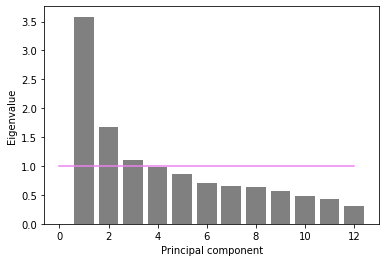

Number of factors selected by Kaiser criterion: 3
Number of factors selected by elbow criterion: 1
Number of factors to account for at least 90% variance: 10


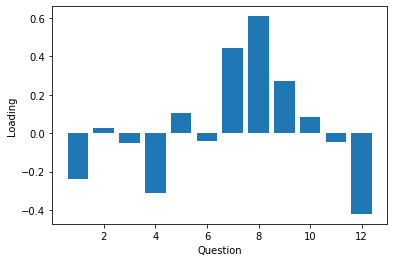

In [ ]:
    
#plotting
numQuestions = len(question_n)
x = np.linspace(1,numQuestions,numQuestions)
plt.bar(x, eigVals, color='grey')
plt.plot([0,numQuestions],[1,1],color='violet') # some violet pride
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()
kaiserThreshold = 1
print('Number of factors selected by Kaiser criterion:', np.count_nonzero(eigVals > kaiserThreshold))
print('Number of factors selected by elbow criterion: 1') #Due to visual inspection by primate
threshold = 90 
eigSum = np.cumsum(varExplained)
print('Number of factors to account for at least 90% variance:', np.count_nonzero(eigSum < threshold) + 1)
whichPrincipalComponent = 2 # Select and look at one factor at a time, in Python indexing
plt.bar(x,loadings[whichPrincipalComponent,:]*-1) # note: eigVecs multiplied by -1 because the direction is arbitrary
#and Python reliably picks the wrong one. So we flip it.
plt.xlabel('Question')
plt.ylabel('Loading')
plt.show() # Show bar plot


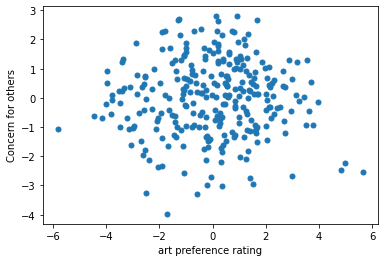

In [ ]:
plt.plot(rotatedData[:,0]*-1,rotatedData[:,1]*-1,'o',markersize=5) 

plt.xlabel('art preference rating')
plt.ylabel('Concern for others')
plt.show()



In [ ]:
P = loadings[whichPrincipalComponent,:]*-1


array([0.38364169, 0.33662453, 0.27865626, 0.20687105, 0.3241872 ,
       0.2909794 , 0.3023467 , 0.2752813 , 0.36173059, 0.36228351])

# scratch
